In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# Project Definition

## Project Overview

This project focuses on analyzing educational data from the KDD Cup 2010, specifically aiming to predict student performance.  The dataset contains interaction logs of students using an online tutoring system. The origin of the data is the KDD Cup 2010 Educational Data Mining Challenge.

The datasets used in this project include:

bridge_to_algebra_2008_2009_train.txt

bridge_to_algebra_2008_2009_test.txt

algebra_2008_2009_train.txt

algebra_2008_2009_test.txt

## Problem Statement

How does past success predict future success? Can we predict the need for educational interventions early enough to be successful?

## Metrics

Given the nature of our problem, which is to predict the future success of students, we are facing a classification problem. Thus, appropriate metrics are necessary to accurately evaluate the model's performance. Here’s a detailed justification for the chosen metrics:

- **Accuracy:** Provides a general measure of how many predictions the model got right. While it gives a broad overview, it may not be sufficient on its own, especially in cases of class imbalance.

- **Precision:** Crucial in our context because it measures the proportion of true positive predictions (correctly identified successful students) among all positive predictions (students predicted to be successful). High precision ensures that when the model identifies a student as likely to succeed, it is usually correct. This reduces the risk of false positives, which could lead to unwarranted complacency in supporting students who might need help.

- **Recall:** Measures the proportion of actual positives (students who indeed succeed) that were correctly identified by the model. High recall is important for ensuring that most students who are likely to succeed are identified, allowing educators to confirm these students are on the right track and focus on those who need intervention.

- **F1-Score:** Is the harmonic mean of precision and recall, providing a single metric that balances both concerns. It is particularly useful when dealing with imbalanced classes, as it ensures that neither precision nor recall is disproportionately prioritized. This balance is vital in education, where both false positives (overestimating success) and false negatives (underestimating success) can have significant consequences.

# Analysis

In [2]:
data = pd.read_csv(r'D:\Datasets\Educación\kddcup_challenge/bridge_to_algebra_2008_2009_train.txt', sep='\t')

**The test data available for download is incomplete, so we cannot use it to evaluate our model. Instead, we will divide our dataset into test and training sets and evaluate its performance.**

In [4]:
print("The dataset has the following dimensions: ",data.shape)

The dataset has the following dimensions:  (20012498, 21)


## Data Exploration


Among the available information, we have:

**Anon Student Id:** Unique, anonymous identifier for each student.

**Problem Hierarchy:** The hierarchy of curriculum levels containing the problem. (e.g., Unit, Section).

**Problem Name:** Unique identifier for a problem.

**Problem View:** The total number of times the student encountered the problem so far.

**Step Name:** Specific step within a problem. Each problem consists of one or more steps (e.g., "find the area of rectangle ABCD" or "divide both sides of the equation by x"). The step name is unique within each problem, but there may be collisions between different problems, so the only unique identifier for a step is the pair of problem_name and step_name.

**Step Start Time:** The starting time of the step. Can be null.

**First Transaction Time:** The time of the first transaction toward the step.

**Correct Transaction Time:** The time of the correct attempt toward the step, if there was one.

**Step End Time:** The time of the last transaction toward the step.

**Step Duration (sec):** The elapsed time of the step in seconds, calculated by adding all of the durations for transactions that were attributed to the step. Can be null (if step start time is null).

**Correct Step Duration (sec):** The step duration if the first attempt for the step was correct.

**Error Step Duration (sec):** The step duration if the first attempt for the step was an error (incorrect attempt or hint request).

**Correct First Attempt:** The tutor's evaluation of the student's first attempt on the step—1 if correct, 0 if an error.

**Incorrects:** Total number of incorrect attempts by the student on the step.

**Hints:** Total number of hints requested by the student for the step.

**Corrects:** Total correct attempts by the student for the step. (Only increases if the step is encountered more than once.)

**KC(SubSkills), KC(KTracedSkills), KC(Rules):**  The identified skills that are used in a problem, where available. A step can have multiple KCs assigned to it. Multiple KCs for a step are separated by ~~ (two tildes). Since opportunity describes practice by knowledge component, the corresponding opportunities are similarly separated by ~~.

**Opportunity(SubSkills), Opportunity(KTracedSkills), Opportunity(Rules):** A count that increases by one each time the student encounters a step with the listed knowledge component. Steps with multiple KCs will have multiple opportunity numbers separated by ~~.


In [5]:
data.head()

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(SubSkills),Opportunity(SubSkills),KC(KTracedSkills),Opportunity(KTracedSkills)
0,1,stu_cc883f541b,"Unit WHOLE-NUMBER-OPERATIONS-1, Section WHOLE-...",WHOLENUMOPS1-083,1,Operation,2009-02-03 14:11:58.0,2009-02-03 14:14:19.0,2009-02-03 14:14:19.0,2009-02-03 14:14:19.0,141.000,141.0,NaN,1,0,0,1,Identify operator,1,Identify operator-1,1
1,2,stu_cc883f541b,"Unit WHOLE-NUMBER-OPERATIONS-1, Section WHOLE-...",WHOLENUMOPS1-083,2,Digit1-1,2009-04-16 14:24:41.0,2009-04-16 14:27:09.0,2009-04-16 14:27:15.0,2009-04-16 14:27:15.0,154.000,NaN,154.000,0,2,0,1,NaN,NaN,NaN,NaN
2,3,stu_cc883f541b,"Unit WHOLE-NUMBER-OPERATIONS-1, Section WHOLE-...",WHOLENUMOPS1-083,2,Digit2-1,2009-04-16 14:27:51.0,2009-04-16 14:28:01.0,2009-04-16 14:28:51.0,2009-04-16 14:28:51.0,59.998,NaN,59.998,0,11,0,1,NaN,NaN,NaN,NaN
3,4,stu_cc883f541b,"Unit WHOLE-NUMBER-OPERATIONS-1, Section WHOLE-...",WHOLENUMOPS1-083,2,Digit2-2,2009-04-16 14:28:51.0,2009-04-16 14:28:54.0,2009-04-16 14:29:09.0,2009-04-16 14:29:09.0,18.000,NaN,18.000,0,9,0,1,NaN,NaN,NaN,NaN
4,5,stu_cc883f541b,"Unit WHOLE-NUMBER-OPERATIONS-1, Section WHOLE-...",WHOLENUMOPS1-083,2,Digit2-3,2009-04-16 14:29:09.0,2009-04-16 14:29:11.0,2009-04-16 14:29:11.0,2009-04-16 14:29:11.0,2.000,2.0,NaN,1,0,0,1,NaN,NaN,NaN,NaN


In [6]:
# Formatting the correct data type for the date columns
data['First Transaction Time'] = pd.to_datetime(data['First Transaction Time'])
data['Correct Transaction Time'] = pd.to_datetime(data['Correct Transaction Time'])
data['Step Start Time'] = pd.to_datetime(data['Step Start Time'])
data['Step End Time'] = pd.to_datetime(data['Step End Time'])

Let's inspect the data and look at some statistics.

In [7]:
data.describe().applymap(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

,Row,Problem View,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects
count,20012498.00,20012498.00,20002217,20012498,19886643,20012498,19982207.00,17216963.00,2765244.00,20012498.00,20012498.00,20012498.00,20012498.00
mean,10006249.50,1.09,2009-01-11 10:52:43.503889152,2009-01-11 11:11:06.794590208,2009-01-11 11:14:47.403783168,2009-01-11 12:07:34.468961280,9.46,6.35,28.83,0.86,0.26,0.05,1.02
min,1.00,1.00,2008-09-06 20:56:56,2008-09-06 20:56:56,2008-09-06 20:56:58,2008-09-06 20:56:58,-59.23,-45.69,-59.23,0.00,0.00,0.00,0.00
25%,5003125.25,1.00,2008-11-10 18:20:17,2008-11-10 18:22:16,2008-11-10 18:28:42,2008-11-10 18:24:25,1.11,1.00,6.00,1.00,0.00,0.00,1.00
50%,10006249.50,1.00,2009-01-08 17:22:53,2009-01-08 17:28:02,2009-01-08 17:22:08,2009-01-08 17:32:18,3.00,2.38,13.00,1.00,0.00,0.00,1.00
75%,15009373.75,1.00,2009-03-11 21:18:18,2009-03-11 21:29:17,2009-03-11 21:13:17.500000,2009-03-11 22:34:59.750000128,7.06,5.12,30.00,1.00,0.00,0.00,1.00
max,20012498.00,29.00,2048-09-07 09:59:51,2048-09-07 10:00:26,2048-09-07 10:01:24,2099-02-26 17:52:06,7395.06,2464.77,7395.06,1.00,1305.00,118.00,283.00
std,5777110.70,0.38,nan,nan,nan,nan,27.40,18.30,53.88,0.35,1.14,0.35,0.32


- The average overall step duration is 9.46 seconds, while the average correct step duration is 6.35 seconds. This indicates that steps that are solved correctly tend to take less time than the average step.

- The average error step duration is 28.83 seconds. This indicates that steps with errors take considerably longer to complete.

- The average number of incorrect attempts is 0.26, while the average number of help requests (hints) is 0.05. This indicates that students generally do not need many attempts to solve a step and rarely ask for help.

- Some steps have had up to 1305 incorrect attempts and 118 help requests, which might suggest particularly difficult steps.

- The average Correct First Attempt is 0.86, meaning that most students solve the steps correctly on their first try. This is the variable we want to predict, and we notice there is an imbalance.

- The columns First Transaction Time, Correct Transaction Time, and Step End Time show times ranging from 2008 to 2048. It might be useful to take a closer look at these dates, as the dataset is supposed to correspond to the 2008-2009 school year.

In [8]:
print('Number of students: ', data['Anon Student Id'].nunique())

Number of students:  6043


Let's determine the percentage of missing values in the data

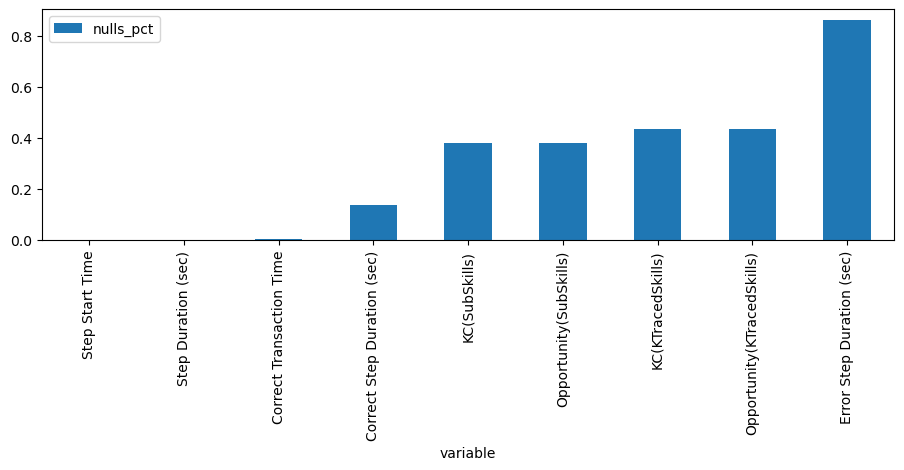

In [9]:
nulls = (data.isnull().sum()/data.shape[0])#.reset_index()
nulls = pd.DataFrame(nulls[nulls > 0 ].reset_index()).rename(columns = {"index": "variable",0:"nulls_pct"})
nulls.sort_values('nulls_pct').plot.bar(x='variable', y='nulls_pct', rot=90,figsize=(11, 3))
plt.show()

- Error Step Duration (Null percentange ~ 80%): A very high percentage nulls, this could indicate that most steps were either solved correctly on the first attempt or that the data for error durations is frequently missing.

- Step Start Time (Null percentange ~ 0%): A few steps don't have a recorded start time. This might mean the student solved the problem by skipping some steps.

- Correct Step Duration (Null percentange ~ 14%): A significant portion of steps do not have a duration for correct attempts. This might suggests that a considerable number of steps were not solved correctly.

- KC(SubSkills) and Opportunity(SubSkills) (Null percentange ~ 30%): This might suggest gaps in the mapping of steps to specific sub-skills.

## Data Visualization

### What is the distribution of time students spend on each step?

We know that, on average, the time to complete a step is 9.46 seconds. However, we can see some very high values. So, let's analyze this variable further to understand its behavior better. A box plot can help identify outliers and visualize the spread of Step Duration (sec).

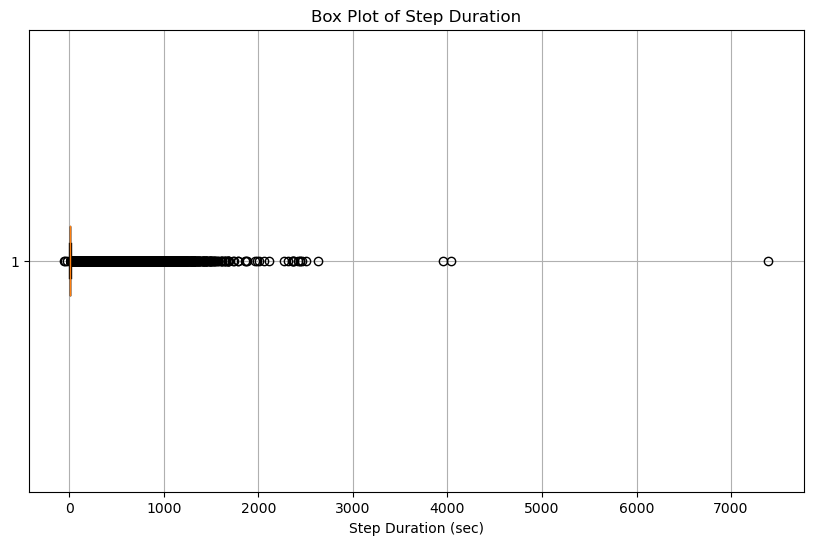

In [10]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['Step Duration (sec)'].dropna(), vert=False)
plt.title('Box Plot of Step Duration')
plt.xlabel('Step Duration (sec)')
plt.grid(True)
plt.show()

When looking at the boxplot of step duration, we can see some outliers. There are times that can go above 1000 seconds and even negative values.

Let's find the 99th percentile and filter out the values above it, as well as the negative times. Then, let's plot the graph again.

In [11]:
percentile_99 = data['Step Duration (sec)'].quantile(0.99)
print(f"The 99th percentile of Step Duration is: {percentile_99} seconds")

The 99th percentile of Step Duration is: 112.0 seconds


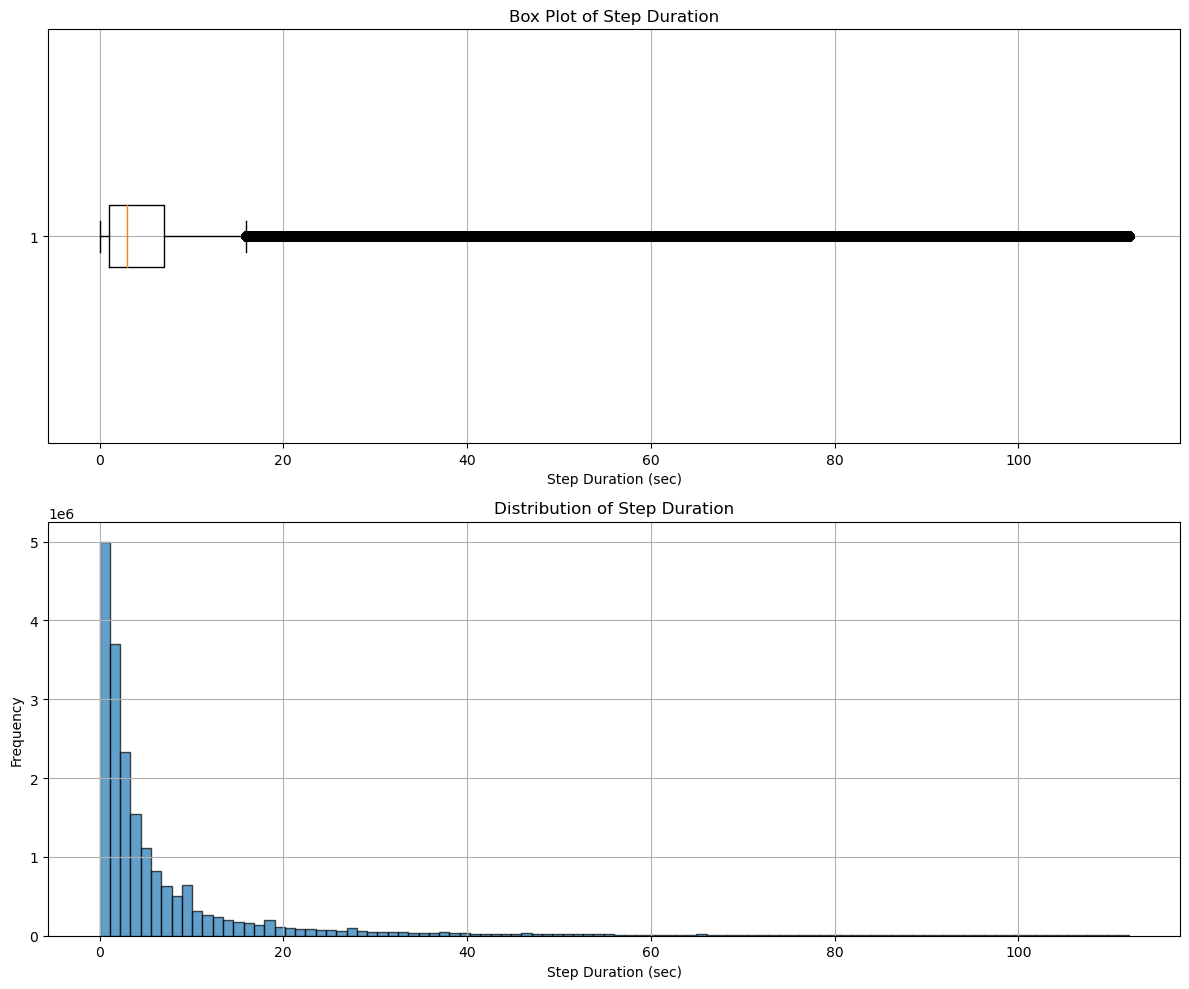

In [12]:
plt.figure(figsize=(12, 10))

# Subplot 1: Box Plot of Step Duration
plt.subplot(2, 1, 1)
plt.boxplot(data[(data['Step Duration (sec)'] <= 112) &
                 (data['Step Duration (sec)'] >= 0)]['Step Duration (sec)'].dropna(), vert=False)
plt.title('Box Plot of Step Duration')
plt.xlabel('Step Duration (sec)')
plt.grid(True)

# Subplot 2: Histogram of Step Duration
plt.subplot(2, 1, 2)
plt.hist(data[(data['Step Duration (sec)'] <= 112) &
                 (data['Step Duration (sec)'] >= 0)]['Step Duration (sec)'].dropna(), bins=100, edgecolor='k', alpha=0.7)
plt.title('Distribution of Step Duration')
plt.xlabel('Step Duration (sec)')
plt.ylabel('Frequency')
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

When we find the 99th percentile, we see that the time is 112 seconds. This means that for the majority of students, the maximum time taken to complete a step is around 2 minutes. Most of the step completion times are concentrated below 20 seconds. This indicates that while there are some instances of very long durations, they are quite rare, and most students complete their steps much more quickly.

### What type of problems do the steps that take longer to complete correspond to?

We will take the values above the 99.99th percentile in step duration and analyze which type of problems they correspond to. This will help us understand if there are specific problem types that consistently take longer for students to complete.

In [13]:
percentile_9999 = data['Step Duration (sec)'].quantile(0.9999)
print(f"The 99.99th percentile of Step Duration is: {percentile_9999} seconds")

The 99.99th percentile of Step Duration is: 647.6275571997911 seconds


In [14]:
long_duration_steps = data[data['Step Duration (sec)'] > percentile_9999].copy()
long_duration_steps['Problem_Step'] = long_duration_steps['Problem Name'] + '_' + long_duration_steps['Step Name']

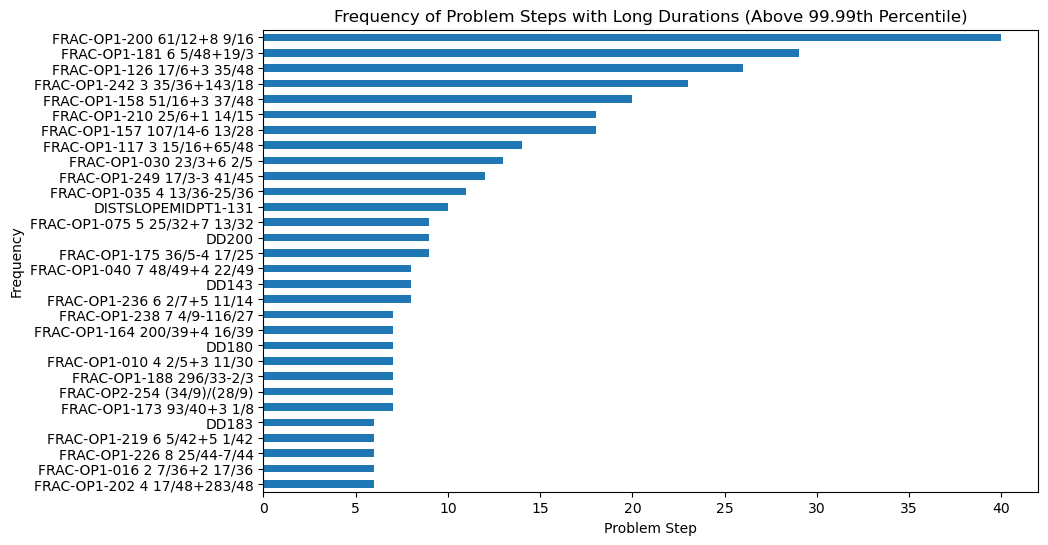

In [15]:
problem_name_counts = long_duration_steps['Problem Name'].value_counts()
filtered_problem_name = problem_name_counts[problem_name_counts > 5].sort_values(ascending=True)
# Plot the bar chart
plt.figure(figsize=(10, 6))
filtered_problem_name.plot(kind='barh')
plt.title('Frequency of Problem Steps with Long Durations (Above 99.99th Percentile)')
plt.xlabel('Problem Step')
plt.ylabel('Frequency')
plt.show()

The analysis reveals that certain fraction problems, such as "FRAC-OP1-200 61/12+8 9/16" with 40 occurrences and "FRAC-OP1-181 6 5/48+19/3" with 29 occurrences, consistently take longer for students to complete. These problems, often involving complex operations with multiple fractions, highlight the areas where students face significant challenges.

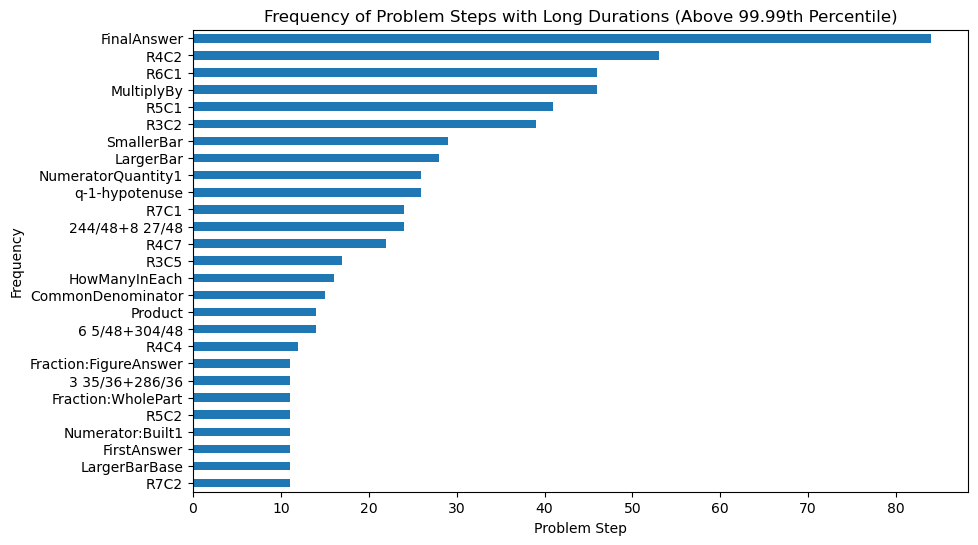

In [16]:
problem_step_counts = long_duration_steps['Step Name'].value_counts()
filtered_step_name = problem_step_counts[problem_step_counts > 10].sort_values(ascending=True)
# Plot the bar chart
plt.figure(figsize=(10, 6))
filtered_step_name.plot(kind='barh')
plt.title('Frequency of Problem Steps with Long Durations (Above 99.99th Percentile)')
plt.xlabel('Problem Step')
plt.ylabel('Frequency')
plt.show()

The analysis suggests that students tend to spend more time on the final steps of problems, likely due to the complexity and the need for careful verification of their answers

### Were the steps that took the longest time eventually completed?

In [17]:
correct_first_attempt_counts = long_duration_steps['Correct First Attempt'].value_counts()

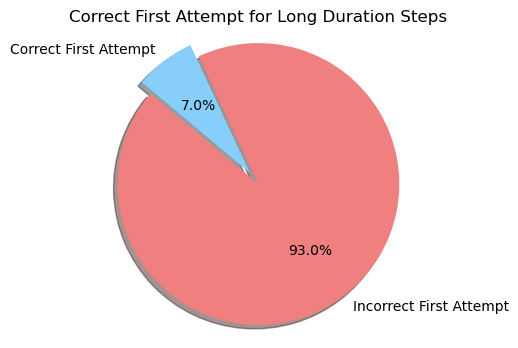

In [18]:
labels = ['Incorrect First Attempt', 'Correct First Attempt']
sizes = [correct_first_attempt_counts[0], correct_first_attempt_counts[1]]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the first slice (Incorrect First Attempt)

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Correct First Attempt for Long Duration Steps')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

This indicates that steps requiring more time to complete are overwhelmingly associated with incorrect first attempts

All preprocessing steps have been clearly documented. Abnormalities or characteristics about the data or input that needed to be addressed have been corrected. If no data preprocessing is necessary, it has been clearly justified.

# Identificación de Tendencias:

Evaluar cómo el rendimiento en los primeros pasos/problemas influye en el rendimiento posterior.


# Methodology

## Data Preprocessing

Since the problem we aim to address is the ability to predict future success, we first need to summarize each student's past performance by grouping the data by student and by problem. We will start with the time variables.

Before grouping, let's deal with the null values for "Step Start Time":

- Since we are not certain if "Step Start Time" is null because the record was not logged correctly or if the student simply skipped that step, we will create a new variable to capture this behavior: 'Skipped steps.'

In [19]:
data.loc[data['Step Start Time'].isnull(),'Skipped steps'] = 1

In [20]:
grouped_data = data.groupby(['Anon Student Id', 'Problem Name']).agg({
    'Problem Hierarchy': 'max',
    'Problem View':'max',
    'Correct First Attempt': ['sum', 'count'],
    'Incorrects': 'sum',
    'Skipped steps':'sum',
    'Hints': 'sum',
    'Step Duration (sec)': ['mean','sum'],
    'Correct Step Duration (sec)':'mean',
    'Error Step Duration (sec)':'mean',
    'Step Start Time':['min','max']
}).reset_index()
grouped_data.columns = ['Anon Student Id', 'Problem Name', 'Problem Hierarchy','Problem View','Total Correct First Attempts',
                        'Total Steps','Total Incorrects','Total Skipped steps','Total Hints', 'Avg Step Duration (sec)',
                        'Total Time on Problem','Avg Correct Step Duration (sec)','Avg Error Duration (sec)',
                        'Problem Start Time','Problem End Time']

In [21]:
grouped_data.head()

,Anon Student Id,Problem Name,Problem Hierarchy,Problem View,Total Correct First Attempts,Total Steps,Total Incorrects,Total Skipped steps,Total Hints,Avg Step Duration (sec),Total Time on Problem,Avg Correct Step Duration (sec),Avg Error Duration (sec),Problem Start Time,Problem End Time
0,stu_000670b50e,GCF-04-12,"Unit GCF, Section gcf-1",1,25,25,0,0.0,0,2.681720,67.043,2.681720,NaN,2008-12-08 21:26:18,2008-12-08 21:27:22
1,stu_000670b50e,GCF-06-08,"Unit GCF, Section gcf-1",2,20,21,1,0.0,0,6.359381,133.547,6.518750,3.172000,2008-11-17 21:41:42,2008-12-08 21:15:22
2,stu_000670b50e,GCF-06-36,"Unit GCF, Section gcf-1",1,28,35,7,0.0,0,4.599943,160.998,3.024214,10.902857,2008-12-08 21:15:38,2008-12-08 21:18:07
3,stu_000670b50e,GCF-08-32,"Unit GCF, Section gcf-1",1,26,26,0,0.0,0,5.989808,155.735,5.989808,NaN,2008-11-17 21:38:52,2008-11-17 21:41:01
4,stu_000670b50e,GCF-09-18,"Unit GCF, Section gcf-1",1,18,25,7,0.0,0,4.990360,124.759,4.731333,5.656429,2008-12-08 21:18:23,2008-12-08 21:20:12


### Handling Missing Values: 

After grouping, we will review the null values.

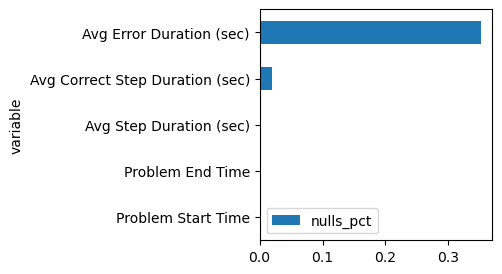

In [23]:
nulls = (grouped_data.isnull().sum()/grouped_data.shape[0])#.reset_index()
nulls = pd.DataFrame(nulls[nulls > 0 ].reset_index()).rename(columns = {"index": "variable",0:"nulls_pct"})
nulls.sort_values('nulls_pct').plot.barh(x='variable', y='nulls_pct',figsize=(3, 3))
plt.show()

Records where "avg step duration" is null indicate that the data was not stored correctly, as most of these records have identical values for the time variables. Since there are only a few such cases, it is more convenient to delete these records.

For "Avg Correct Step Duration (sec)," if it is null, it indicates that the student got all the steps wrong, so we can impute this value with 0. Similarly, for "Avg Error Duration (sec)," if it is null, it indicates that the student got all the steps correct, so we can also impute this value with 0.

In [24]:
def clean_data(grouped_data):
    """
    Cleans the grouped data by handling missing values.
    Args:
        grouped_data (pd.DataFrame): The input DataFrame to be cleaned.
    Returns:
        pd.DataFrame: The cleaned DataFrame with no missing values in the specified columns.
    """
    grouped_data = grouped_data.dropna(subset=['Avg Step Duration (sec)']).copy()
    grouped_data['Avg Correct Step Duration (sec)'] = grouped_data['Avg Correct Step Duration (sec)'].fillna(0)
    grouped_data['Avg Error Duration (sec)'] = grouped_data['Avg Error Duration (sec)'].fillna(0)
    return grouped_data

### Feature Engineering

We will create new features to capture important aspects of student performance and problem difficulty.

In [25]:
def define_success(grouped_data):
    """
    Defines success based on the proportion of correct first attempts. We will also organize the data in preparation 
    for generating the target variable.
    Args:
        grouped_data (pd.DataFrame): The input DataFrame.
    Returns:
        pd.DataFrame: The DataFrame with the new column 'Success'.
    """
    grouped_data['Proportion Correct First Attempts'] = grouped_data['Total Correct First Attempts'] / grouped_data['Total Steps']
    grouped_data['Success'] = (grouped_data['Proportion Correct First Attempts'] >= 0.9).astype(int)
    grouped_data = grouped_data.sort_values(by=['Anon Student Id', 'Problem Start Time']).reset_index(drop=True)
    return grouped_data

def split_problem_hierarchy(grouped_data):
    """
    Splits the 'Problem Hierarchy' column into 'Unit' and 'Section'.
    Args:
        grouped_data (pd.DataFrame): The input DataFrame.
    Returns:
        pd.DataFrame: The DataFrame with the new columns 'Unit' and 'Section'.
    """
    grouped_data[['Unit', 'Section']] = grouped_data['Problem Hierarchy'].str.split(', Section ', expand=True)
    grouped_data['Unit'] = grouped_data['Unit'].str.replace('Unit ', '')
    return grouped_data


def calculate_perceived_problem_difficulty(grouped_data):
    """
    Calculates the perceived difficulty of each problem.
    Args:
        grouped_data (pd.DataFrame): The input DataFrame.
    Returns:
        pd.DataFrame: The DataFrame with the new columns 'Perceived Problem Difficulty' and 'Perceived Next Problem Difficulty'.
    """
    perceived_problem_difficulty = grouped_data.groupby('Problem Name')['Success'].mean().reset_index()
    perceived_problem_difficulty.columns = ['Problem Name', 'Perceived Problem Difficulty']
    perceived_problem_difficulty['Perceived Problem Difficulty'] = 1 - perceived_problem_difficulty['Perceived Problem Difficulty']
    grouped_data = grouped_data.merge(perceived_problem_difficulty, on='Problem Name', how='left')
    grouped_data['Perceived Next Problem Difficulty'] = grouped_data.groupby('Anon Student Id')['Perceived Problem Difficulty'].shift(-1)
    return grouped_data

def define_new_unit_and_section(grouped_data):
    """
    Defines whether the next problem belongs to a new unit or section.
    Args:
        grouped_data (pd.DataFrame): The input DataFrame.
    Returns:
        pd.DataFrame: The DataFrame with the new columns 'New Unit' and 'New Section'.
    """
    grouped_data['Next Unit'] = grouped_data.groupby('Anon Student Id')['Unit'].shift(-1)
    grouped_data['New Unit'] = 1
    grouped_data.loc[grouped_data['Next Unit'] == grouped_data['Unit'], 'New Unit'] = 0
    grouped_data['Next Section'] = grouped_data.groupby('Anon Student Id')['Section'].shift(-1)
    grouped_data['New Section'] = 1
    grouped_data.loc[grouped_data['Next Section'] == grouped_data['Section'], 'New Section'] = 0
    return grouped_data

def calculate_cumulative_metrics(grouped_data):
    """
    Calculates cumulative metrics for hints, incorrects, and error duration.
    Args:
        grouped_data (pd.DataFrame): The input DataFrame.
    Returns:
        pd.DataFrame: The DataFrame with new cumulative metrics.
    """
    grouped_data['Cumulative Hints'] = grouped_data.groupby('Anon Student Id')['Total Hints'].cumsum()
    grouped_data['Cumulative Incorrects'] = grouped_data.groupby('Anon Student Id')['Total Incorrects'].cumsum()
    grouped_data['Cumulative Error Duration'] = grouped_data.groupby('Anon Student Id')['Avg Error Duration (sec)'].cumsum()
    grouped_data['Problems Completed'] = grouped_data.groupby('Anon Student Id').cumcount(ascending=True) + 1
    grouped_data['Cumulative Avg Error Duration'] = grouped_data['Cumulative Error Duration'] / grouped_data['Problems Completed']
    return grouped_data


### Predictive Variable

In [26]:
def define_future_success(grouped_data):
    """
    Defines the future success of students by predicting their performance on the next problem.
    
    This function creates a new column called 'Future Success' which indicates whether a student 
    is likely to succeed in the next problem based on their current performance. This helps in 
    identifying students who might need additional support or intervention before they move on 
    to the next problem.
    Args:
        grouped_data (pd.DataFrame): The input DataFrame.
    Returns:
        pd.DataFrame: The DataFrame with the new column 'Future Success'.
    """
    grouped_data['Future Success'] = grouped_data.groupby('Anon Student Id')['Success'].shift(-1)
    grouped_data = grouped_data.dropna(subset=['Future Success'])
    return grouped_data

In [27]:
def process_data(data):
    """
    Processes the data through various steps and returns the final DataFrame.
    Args:
        data (pd.DataFrame): The input raw DataFrame.
    Returns:
        pd.DataFrame: The processed DataFrame.
    """
    data = clean_data(data)
    data = split_problem_hierarchy(data)
    data = define_success(data)
    data = calculate_perceived_problem_difficulty(data)
    data = define_new_unit_and_section(data)
    data = calculate_cumulative_metrics(data)
    data = define_future_success(data)
    return data

# Example usage
processed_data = process_data(grouped_data)

In [28]:
processed_data.shape

(1618276, 31)

In [31]:
processed_data.head()

,Anon Student Id,Problem Name,Problem Hierarchy,Problem View,Total Correct First Attempts,Total Steps,Total Incorrects,Total Skipped steps,Total Hints,Avg Step Duration (sec),Total Time on Problem,Avg Correct Step Duration (sec),Avg Error Duration (sec),Problem Start Time,Problem End Time,Unit,Section,Proportion Correct First Attempts,Success,Perceived Problem Difficulty,Perceived Next Problem Difficulty,Next Unit,New Unit,Next Section,New Section,Cumulative Hints,Cumulative Incorrects,Cumulative Error Duration,Problems Completed,Cumulative Avg Error Duration,Future Success
0,stu_000670b50e,WHOLENUMOPS1-019,"Unit WHOLE-NUMBER-OPERATIONS-1, Section WHOLE-...",3,20,22,2,0.0,0,11.386955,250.513,11.515150,10.10500,2008-10-29 20:07:08,2008-10-29 20:13:51,WHOLE-NUMBER-OPERATIONS-1,WHOLE-NUMBER-OPERATIONS-I-1,0.909091,1,0.211268,0.330233,WHOLE-NUMBER-OPERATIONS-1,0,WHOLE-NUMBER-OPERATIONS-I-1,0,0,2,10.10500,1,10.105000,1.0
1,stu_000670b50e,WHOLENUMOPS1-016,"Unit WHOLE-NUMBER-OPERATIONS-1, Section WHOLE-...",1,19,19,0,0.0,0,6.314211,119.970,6.314211,0.00000,2008-10-29 20:13:53,2008-10-29 20:15:34,WHOLE-NUMBER-OPERATIONS-1,WHOLE-NUMBER-OPERATIONS-I-1,1.000000,1,0.330233,0.176471,WHOLE-NUMBER-OPERATIONS-1,0,WHOLE-NUMBER-OPERATIONS-I-1,0,0,2,10.10500,2,5.052500,1.0
2,stu_000670b50e,WHOLENUMOPS1-187,"Unit WHOLE-NUMBER-OPERATIONS-1, Section WHOLE-...",1,12,13,1,0.0,0,6.846154,89.000,6.804833,7.34200,2008-10-29 20:15:56,2008-10-29 20:17:12,WHOLE-NUMBER-OPERATIONS-1,WHOLE-NUMBER-OPERATIONS-I-1,0.923077,1,0.176471,0.271523,WHOLE-NUMBER-OPERATIONS-1,0,WHOLE-NUMBER-OPERATIONS-I-1,0,0,3,17.44700,3,5.815667,1.0
3,stu_000670b50e,WHOLENUMOPS1-179,"Unit WHOLE-NUMBER-OPERATIONS-1, Section WHOLE-...",1,16,16,0,0.0,0,6.133875,98.142,6.133875,0.00000,2008-10-29 20:17:29,2008-10-29 20:18:57,WHOLE-NUMBER-OPERATIONS-1,WHOLE-NUMBER-OPERATIONS-I-1,1.000000,1,0.271523,0.715134,WHOLE-NUMBER-OPERATIONS-1,0,WHOLE-NUMBER-OPERATIONS-I-2,1,0,3,17.44700,4,4.361750,0.0
4,stu_000670b50e,WHOLENUMOPS2-022,"Unit WHOLE-NUMBER-OPERATIONS-1, Section WHOLE-...",1,16,20,4,0.0,0,13.627050,272.541,5.487625,46.18475,2008-10-29 20:19:14,2008-10-29 20:23:38,WHOLE-NUMBER-OPERATIONS-1,WHOLE-NUMBER-OPERATIONS-I-2,0.800000,0,0.715134,0.438776,WHOLE-NUMBER-OPERATIONS-1,0,WHOLE-NUMBER-OPERATIONS-I-2,0,0,7,63.63175,5,12.726350,1.0


## Inplementation

The implementation phase of this project focuses on identifying the key variables and algorithms used to predict the target variable, as well as the process of separating the data into training and testing sets. This phase ensures that the model is both robust and accurate in predicting student success.

In [32]:
def plot_correlation_heatmap(data, title='Correlation Heatmap', cmap='YlGnBu'):
    """
    Generates a heatmap from the correlation matrix of the given DataFrame.

    Args:
        data (pd.DataFrame): The data to compute the correlation matrix from.
        title (str): The title of the heatmap.
        cmap (str): The colormap for the heatmap.

    Returns:
        None: Displays the heatmap.
    """
    # Compute the correlation matrix
    corr_matrix = data.corr()

    plt.figure(figsize=(15, 10))
    sns.set_theme()

    # Create the heatmap
    heatmap = sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".2f",
        cmap=cmap,
        linewidths=.5,
        linecolor='gray',
        cbar_kws={'label': 'Correlation Coefficient'},
        square=True,
        annot_kws={"size": 8}  # Set font size for annotations
    )

    # Customize the heatmap
    heatmap.set_title(title, fontsize=18)
    heatmap.set_xlabel('Variables', fontsize=14)
    heatmap.set_ylabel('Variables', fontsize=14)
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=10, rotation=0)

    # Adjust layout for better fit
    plt.tight_layout()

    # Show the heatmap
    plt.show()

In [33]:
variables = ['Problem View','Total Correct First Attempts', 'Total Steps', 'Total Incorrects','Total Skipped steps', 
             'Total Hints', 'Avg Step Duration (sec)','Total Time on Problem', 'Avg Correct Step Duration (sec)',
             'Avg Error Duration (sec)','Proportion Correct First Attempts','Perceived Problem Difficulty',
             'Perceived Next Problem Difficulty','New Unit','New Section','Cumulative Hints', 'Cumulative Incorrects',
             'Cumulative Error Duration', 'Problems Completed','Cumulative Avg Error Duration', 'Future Success']

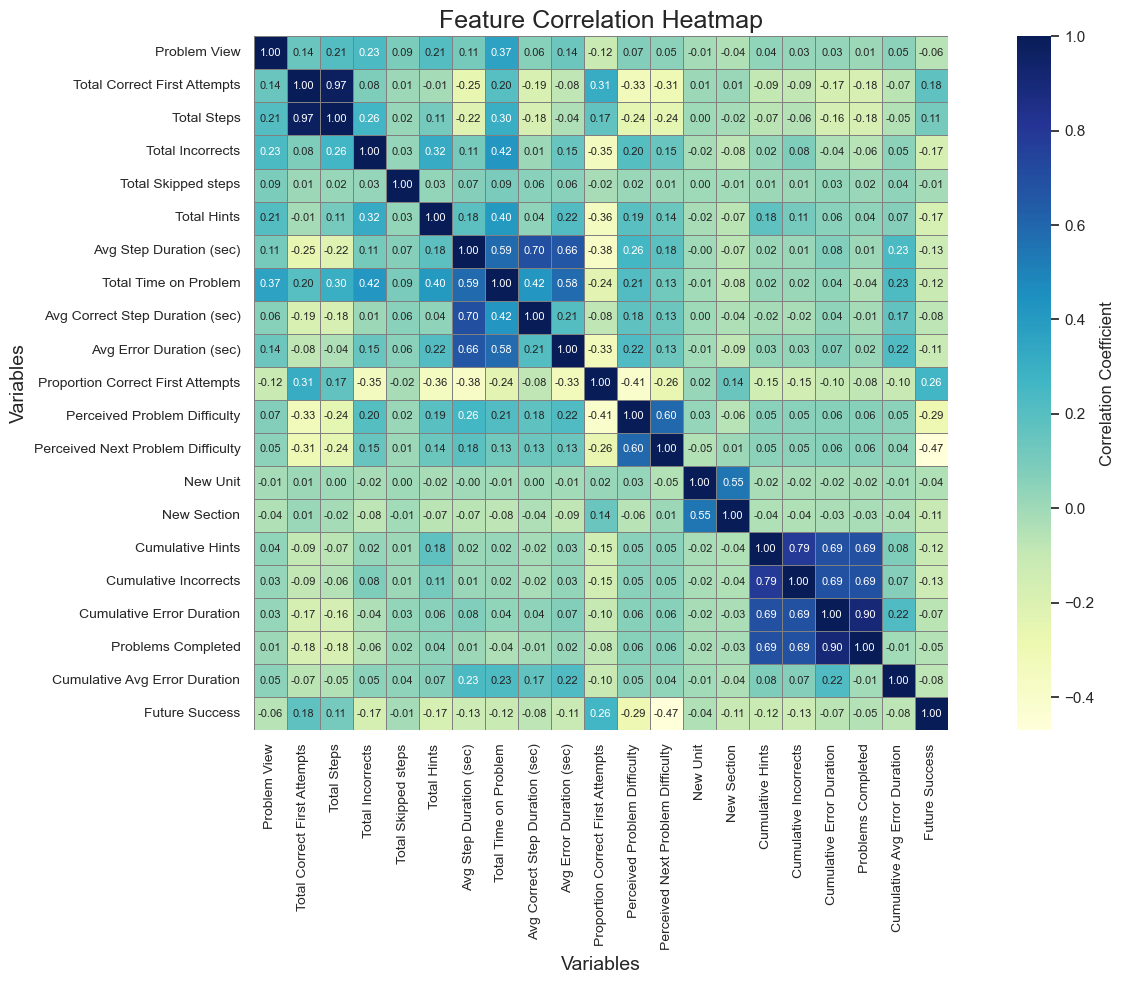

In [34]:
plot_correlation_heatmap(processed_data[variables], title='Feature Correlation Heatmap')

According to the heatmap results, we will select the following variables to start with the implementation of the predictive algorithm:

In [35]:
features = ['Total Correct First Attempts','Total Incorrects', 'Total Hints', 'Avg Step Duration (sec)',
             'Total Time on Problem','Avg Error Duration (sec)','Proportion Correct First Attempts',
             'Perceived Problem Difficulty','Perceived Next Problem Difficulty','New Section','Cumulative Hints', 
             'Cumulative Incorrects']

### Data Splitting

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [43]:
X = processed_data[features]
y = processed_data['Future Success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
model = RandomForestClassifier(random_state=42,n_jobs=-1)
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72    157146
         1.0       0.74      0.73      0.74    166510

    accuracy                           0.73    323656
   macro avg       0.73      0.73      0.73    323656
weighted avg       0.73      0.73      0.73    323656

AUC: 0.7286329064558744


In [116]:
print(f'Original Data Volume shape for training: {X_train.shape}')

Original Data Volume shape for training: (1294620, 12)


Due to the large volume of data available, we will reduce the dataset size for training purposes without compromising the model's performance. Given that our target classes are balanced, we can confidently select a random sample from the entire dataset.

By carefully reducing the dataset, we aim to achieve several objectives:

1. **Efficiency in Training**:
   - Training on a smaller subset of the data will significantly reduce the computational resources and time required. This allows for quicker iterations and more rapid model development.

2. **Maintaining Performance**:
   - Since the target classes are balanced, the random sampling will still represent the overall distribution of the data. This ensures that the model's ability to learn and generalize remains intact.

3. **Scalability**:
   - Working with a smaller, yet representative, dataset makes it easier to experiment with different models and hyperparameters. This approach is scalable, as insights gained from the smaller dataset can be applied to the full dataset when needed.

By implementing this data reduction strategy, we can streamline the training process while ensuring that the model's accuracy and generalization capabilities are preserved. This method leverages the balanced nature of our target variable, making the sampling process straightforward and effective.

In [56]:
def reduce_dataset_size(X, y, reduction_factor=0.5):
    """
    Reduces the dataset size by randomly sampling a fraction of the data.
    Args:
        X (pd.DataFrame or np.ndarray): Features.
        y (pd.Series or np.ndarray): Target variable.
        reduction_factor (float): Fraction of the dataset to keep (default is 0.5).
    Returns:
        X_reduced (pd.DataFrame or np.ndarray): Reduced features.
        y_reduced (pd.Series or np.ndarray): Reduced target variable.
    """
    data = X.copy()
    data['target'] = y
    # Calculate the number of samples to keep
    n_samples = int(len(data) * reduction_factor)
    # Randomly sample the data
    data_reduced = data.sample(n=n_samples, random_state=42).reset_index(drop=True)
    # Separate the features and target variable
    X_reduced = data_reduced.drop(columns=['target'])
    y_reduced = data_reduced['target']
    return X_reduced, y_reduced

In [64]:
X_reduced, y_reduced = reduce_dataset_size(X_train, y_train, reduction_factor=0.2)

In [117]:
print(f'Data Volume for training after sampling: {X_reduced.shape}')

Data Volume for training after sampling: (258924, 12)


In [65]:
model = RandomForestClassifier(random_state=999,n_jobs=-2)
model.fit(X_reduced, y_reduced)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72    157146
         1.0       0.74      0.73      0.73    166510

    accuracy                           0.73    323656
   macro avg       0.73      0.73      0.73    323656
weighted avg       0.73      0.73      0.73    323656

AUC: 0.7261230902013721


## Refinement

### The Importance of Parameter Tuning

Parameter tuning is a critical step in optimizing the performance of a machine learning model. By carefully selecting and adjusting the hyperparameters, such as `max_depth`, `min_samples_leaf`, `min_samples_split`, and `n_estimators`, we can significantly enhance the model's ability to learn from the data. Proper tuning helps in finding the right balance between underfitting and overfitting, ensuring that the model generalizes well to new, unseen data. Without parameter tuning, a model might perform poorly, either because it is too simplistic to capture the underlying patterns (underfitting) or too complex and overly tailored to the training data (overfitting). Therefore, investing time in parameter tuning leads to more accurate, reliable, and efficient models, ultimately resulting in better decision-making and insights.

In [76]:
param_dist = {
    'n_estimators': randint(100, 250),
    'max_depth': [5, 10, 20],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(2, 11),
}

In [77]:
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20, 
    cv=3, 
    n_jobs=-1, 
    verbose=3, 
    scoring='accuracy', 
    random_state=999)

# Fit RandomizedSearchCV
random_search.fit(X_reduced, y_reduced)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Predict and evaluate on the test set
y_pred = random_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 202}
Best Score: 0.730650692867405
              precision    recall  f1-score   support

         0.0       0.73      0.72      0.72    157146
         1.0       0.74      0.75      0.74    166510

    accuracy                           0.73    323656
   macro avg       0.73      0.73      0.73    323656
weighted avg       0.73      0.73      0.73    323656



### Performance Indicators

Parameter tuning has led to a slight improvement in the model's precision for class 0.0 and recall for class 1.0, resulting in a better balance between precision and recall for positive cases. While the overall accuracy and macro averages remained the same, the enhanced precision and recall metrics highlight the model's improved capability in correctly identifying relevant instances. This demonstrates the value of parameter tuning in refining model performance and achieving more reliable and accurate predictions.

In [78]:
results_df = pd.DataFrame(random_search.cv_results_)

# Results

## Model Evaluation and Validation

### Cross-Validation

Cross-validation is crucial in this context as it ensures that the model's performance is robust and generalizes well to unseen data. By fitting 3 folds for each candidate, the model's hyperparameters are evaluated on multiple subsets of the data, providing a reliable estimate of model performance.

Some important points to consider:

- **Mean Test Score (mean_test_score):** Represents the average accuracy of the model across different cross-validation folds.
- **Standard Deviation of Test Scores (std_test_score):** Indicates the variability in accuracy across folds.
- **Mean Fit Time (mean_fit_time):** The average time taken to fit the model.
- **Standard Deviation of Fit Time (std_fit_time):** Indicates the variability in the fit time.
- **Hyperparameters:** Includes param_max_depth, param_min_samples_leaf, param_min_samples_split, param_n_estimators.

Below is the resulting dataframe with the results of the random search.

In [98]:
results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,49.332449,1.024168,1.202635,0.016450,5,7,3,116,"{'max_depth': 5, 'min_samples_leaf': 7, 'min_s...",0.719852,0.718763,0.717639,0.718751,0.000903,19
1,169.167938,4.710522,4.273145,0.203889,10,7,10,236,"{'max_depth': 10, 'min_samples_leaf': 7, 'min_...",0.730257,0.729144,0.728947,0.729450,0.000576,11
2,46.382455,0.105392,1.186039,0.006639,5,7,4,111,"{'max_depth': 5, 'min_samples_leaf': 7, 'min_s...",0.719609,0.719053,0.717593,0.718751,0.000850,19
3,110.933112,2.223687,2.844912,0.061290,10,9,6,150,"{'max_depth': 10, 'min_samples_leaf': 9, 'min_...",0.729747,0.729249,0.728426,0.729141,0.000545,13
4,276.994513,2.944833,10.162873,0.178763,20,9,8,245,"{'max_depth': 20, 'min_samples_leaf': 9, 'min_...",0.731427,0.730720,0.729168,0.730438,0.000944,3


The process involved fitting 3 folds for each of the 20 hyperparameter candidates, resulting in a total of 60 fits. The best model was identified with the following parameters:

- **max_depth**: 20
- **min_samples_leaf**: 7
- **min_samples_split**: 5
- **n_estimators**: 202

The best model achieved a score of 0.7306.

### Importance of Hyperparameters

1. **max_depth**: Controls the maximum depth of each tree in the forest. Setting this to 20 ensures that the trees are complex enough to capture the patterns in the data without overfitting.

2. **min_samples_leaf**: Determines the minimum number of samples required to be at a leaf node. Setting this to 7 helps to prevent the model from learning noise in the data.

3. **min_samples_split**: Specifies the minimum number of samples required to split an internal node. Setting this to 5 ensures that the model considers splits that might capture subtle patterns in the data.

4. **n_estimators**: The number of trees in the forest. A higher number of estimators, set to 20, typically leads to better performance by reducing variance, though it also increases computational cost.

With the resulting dataframe from parameter tuning **results_df**, we can see the impact of each hyperparameter on the overall model performance. We can analyze each of the hyperparameters in pairs for example:

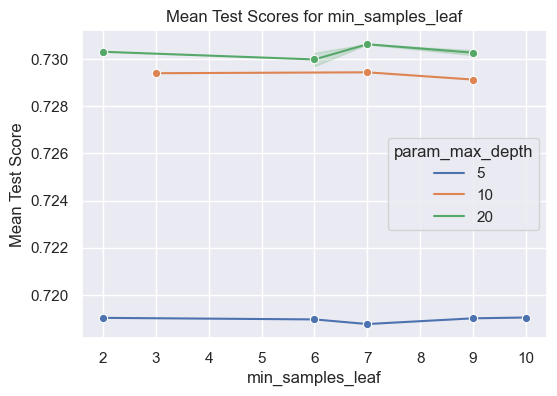

In [108]:
results_df['param_n_estimators'] = results_df['param_n_estimators'].astype(int)
results_df['param_max_depth'] = results_df['param_max_depth'].astype(str)

# 1. Boxplot of Mean Test Scores for min_samples_leaf
plt.figure(figsize=(6, 4))
sns.lineplot(x='param_min_samples_leaf', y='mean_test_score', data=results_df, hue='param_max_depth', marker='o')
plt.title('Mean Test Scores for min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Mean Test Score')
plt.show()

The chart demonstrates that deeper trees (max_depth=20) are robust and consistently achieve high accuracy across different values of min_samples_leaf. Intermediate depth trees (max_depth=10) also perform well, with minimal sensitivity to changes in min_samples_leaf. Shallow trees (max_depth=5), on the other hand, underperform significantly and are not sensitive to min_samples_leaf adjustments, highlighting their inadequacy for this dataset.

The parallel coordinates plot shown here illustrates the relationship between different hyperparameters and the model performance score for a Random Forest model. 

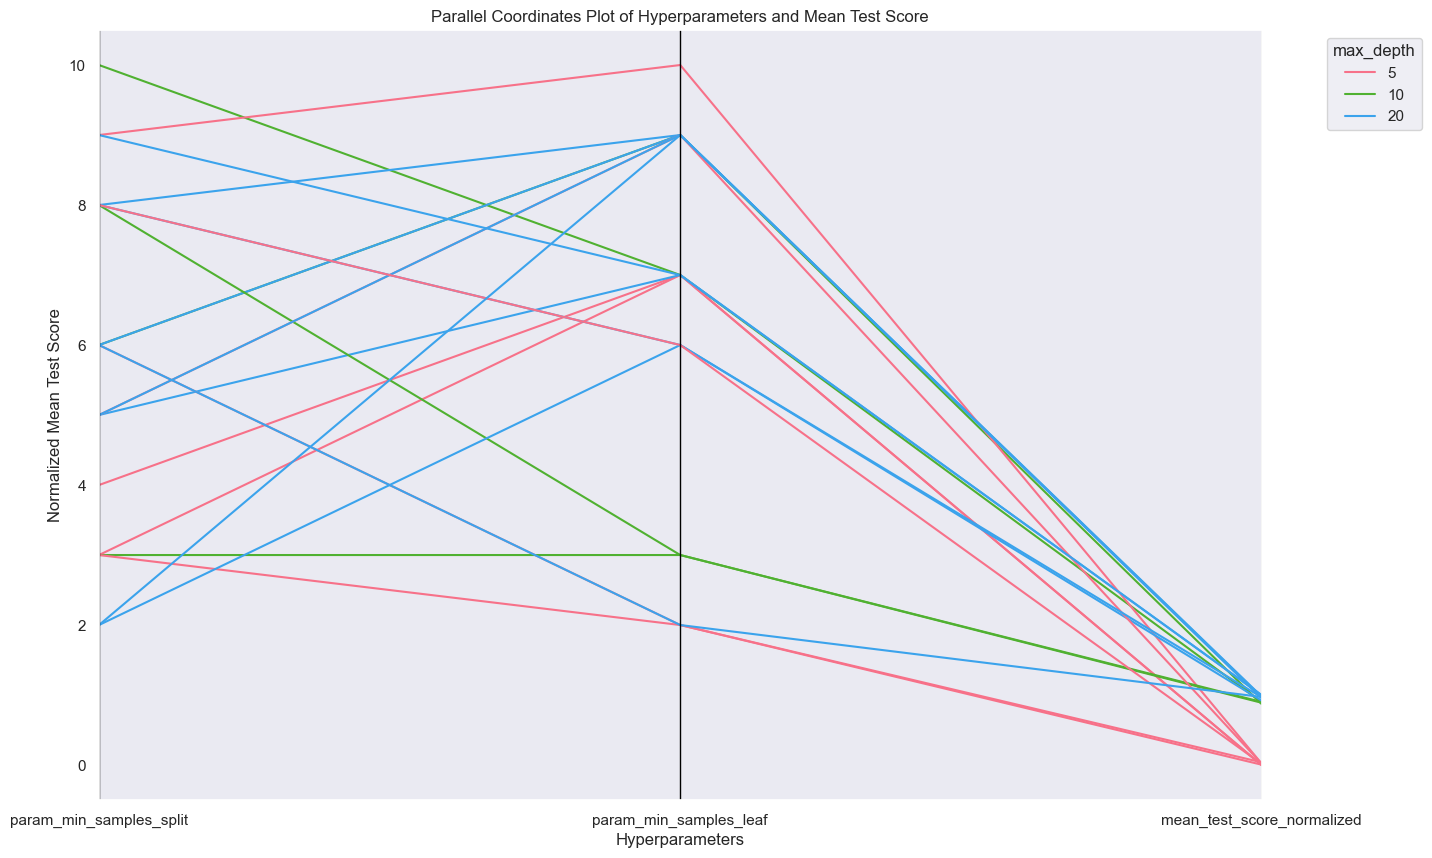

In [83]:
from pandas.plotting import parallel_coordinates

# Ensure the relevant columns are of the correct type
results_df['param_n_estimators'] = results_df['param_n_estimators'].astype(int)
results_df['param_max_depth'] = results_df['param_max_depth'].astype(str)
results_df['param_min_samples_split'] = results_df['param_min_samples_split'].astype(int)
results_df['param_min_samples_leaf'] = results_df['param_min_samples_leaf'].astype(int)

# Create a subset of results_df for parallel coordinates plot
parallel_df = results_df[['param_n_estimators', 'param_max_depth', 
                          'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score']].copy()

# Normalize mean_test_score to make it comparable with other parameters
parallel_df['mean_test_score_normalized'] = (parallel_df['mean_test_score'] - parallel_df['mean_test_score'].min()) / (
                                             parallel_df['mean_test_score'].max() - parallel_df['mean_test_score'].min())

# Plotting parallel coordinates
plt.figure(figsize=(15, 10))
parallel_coordinates(parallel_df, 'param_max_depth', cols=[
                                  'param_min_samples_split', 'param_min_samples_leaf',
                                  'mean_test_score_normalized'], 
                     color=sns.color_palette("husl", len(parallel_df['param_max_depth'].unique())))
plt.title('Parallel Coordinates Plot of Hyperparameters and Mean Test Score')
plt.xlabel('Hyperparameters')
plt.ylabel('Normalized Mean Test Score')
plt.legend(title='max_depth', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Underperformance of Shallow Models:

Lines representing max_depth=5 (red) consistently show lower mean test scores. This suggests that shallow trees are insufficient for capturing the necessary complexity in the data, leading to poorer performance.

- Impact of min_samples_split and min_samples_leaf:

For max_depth=20, the lines remain relatively flat across the param_min_samples_split and param_min_samples_leaf axes, indicating that the performance is less sensitive to these parameters when the trees are deep enough.
For max_depth=5 and max_depth=10, there is more variability in the lines across these parameters, indicating that fine-tuning min_samples_split and min_samples_leaf is more critical for shallower models.

- Parameter Sensitivity:

The plot shows intersecting lines, especially for max_depth=5 and max_depth=10, highlighting that these models are more sensitive to changes in min_samples_split and min_samples_leaf. This suggests that optimal values for these parameters are crucial for improving performance in shallower models.

## Justification

We have evidence that parameter tuning has led to a slight improvement in the model's performance. Let’s delve into the techniques used to achieve this enhancement and the impact of each on the model’s metrics.

### Exploration of Techniques

1. **Random Search**:
   - Random Search was employed to fine-tune the hyperparameters. This method provided a good starting point by exploring the hyperparameter space more efficiently than a naive approach.

2. **Cross-Validation**:
   - Cross-validation was integral in assessing the model's performance across different subsets of the data. By fitting 3 folds for each candidate, we ensured that the model's evaluation was robust and not biased by any particular subset of data. This method helped in mitigating overfitting and provided a reliable estimate of the model's performance.
   
### Impact of Parameter Tuning on Performance Metrics
 
1. **Precision**:
   - **Class 0.0**: Improved from 0.72 to 0.73. This increase indicates that the model is now better at correctly identifying true negatives, reducing the rate of false positives.
   - **Class 1.0**: Remained consistent at 0.74, showing stable performance in correctly identifying true positives.

2. **Recall**:
   - **Class 0.0**: Maintained at 0.72, indicating consistent capability in finding all relevant negatives.
   - **Class 1.0**: Improved from 0.73 to 0.75, suggesting that the model is now more effective in capturing all relevant positives, reducing the rate of false negatives.

3. **F1-Score**:
   - **Class 0.0**: Consistent at 0.72, reflecting a balanced trade-off between precision and recall.
   - **Class 1.0**: Improved from 0.73 to 0.74, demonstrating better overall balance between precision and recall for positive cases.

# Conclusion

## Reflection

- In this project, we aimed to predict future student success by analyzing past performance data. This involved several key steps:

#### Data Preprocessing:

- Handling null values: We introduced a new variable, 'Skipped steps,' to account for the possibility of steps being skipped or not logged.
- Grouping data: We aggregated the data by student and problem, summarizing various performance metrics.

#### Feature Engineering:

- Created new features such as total correct first attempts, total incorrect attempts, and various durations to better capture student performance.

#### Model Training and Parameter Tuning:

- Employed techniques such as Random Search for hyperparameter tuning.
- Used cross-validation to ensure the robustness and generalizability of the model.


#### Interesting Aspects

One particularly interesting aspect was defining the target variable. We aimed to predict future success, which required a clear and accurate definition of what constitutes "success." This involved analyzing various metrics and determining a threshold for success based on past performance. The process of summarizing each student's performance, taking into account correct first attempts, incorrect attempts, and other relevant factors, provided a comprehensive understanding of their learning patterns.

## Improvement

One way to improve the implementation is by using Grid Search for hyperparameter tuning. While Random Search helped us explore a wide range of hyperparameters quickly, Grid Search could help us fine-tune the parameters more precisely. This means searching in a smaller, more focused area identified by Random Search to potentially get even better model performance.

Another improvement could be creating additional variables using the skills information in the dataset. For example, we could use:

- **KC(SubSkills), KC(KTracedSkills), KC(Rules)**
- **Opportunity(SubSkills), Opportunity(KTracedSkills), Opportunity(Rules)**

These variables can help us understand how often and how well students practice different skills, which might strongly relate to their performance.

Lastly, trying other algorithms might give us better results. We used Random Forest because of computing limits, but other algorithms like Gradient Boosting Machines (GBM), XGBoost, or even deep learning models could capture more complex patterns in the data and improve performance.

By making these improvements, the model could become more accurate and give deeper insights into student performance. This would help us make better predictions and offer more effective educational support.
